In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
candy_data_csv = Path("../Resources/Candy_Sales.csv")
candy_sales_df=pd.read_csv(candy_data_csv)


In [ ]:
# Clean Data

In [ ]:
# Visualizations (2 per question = 12)

In [ ]:
# Which Season Wins (Jose)

In [3]:
# Trends over time (Nicholas)
candy_sales_df["Order Date"] = pd.to_datetime(candy_sales_df["Order Date"])
candy_sales_df["Year"] = candy_sales_df["Order Date"].dt.year
division_year_summary = candy_sales_df.groupby(["Division", "Year"]).agg(
    Total_Sales=("Sales", "sum"),
    Total_Gross_Profit=("Gross Profit", "sum")
).reset_index()
division_year_summary

,Division,Year,Total_Sales,Total_Gross_Profit
0,Chocolate,2021,26356.36,17759.68
1,Chocolate,2022,27763.20,18711.66
2,Chocolate,2023,34193.38,23090.44
3,Chocolate,2024,43379.96,29262.84
4,Other,2021,2549.25,1155.45
5,Other,2022,1207.75,479.55
6,Other,2023,2461.75,1103.95
7,Other,2024,3444.50,1594.50
8,Sugar,2021,47.94,27.24
9,Sugar,2022,31.70,17.85


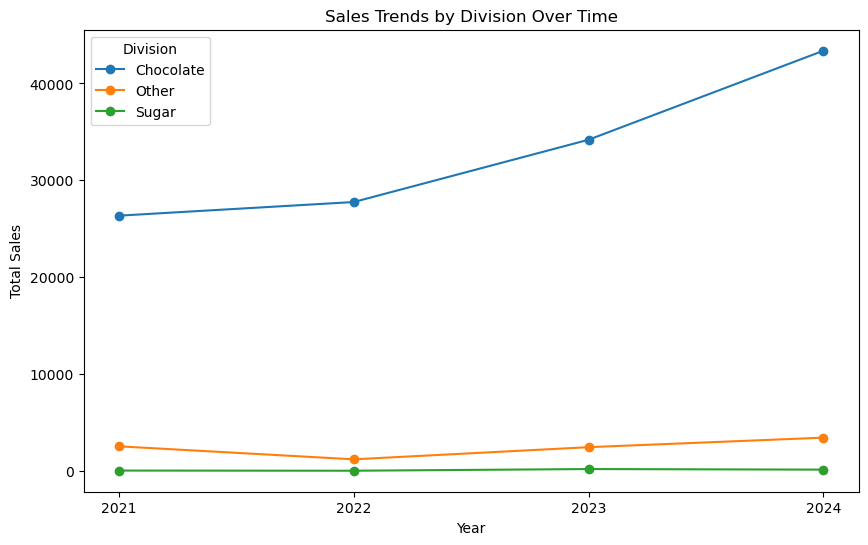

In [4]:
pivot_division_year_summary= division_year_summary.pivot(index="Year", columns="Division", values="Total_Sales")
pivot_division_year_summary.plot(kind="line", figsize=(10, 6), marker='o')

plt.title("Sales Trends by Division Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks([2021, 2022, 2023, 2024])  
plt.legend(title="Division")
plt.show()

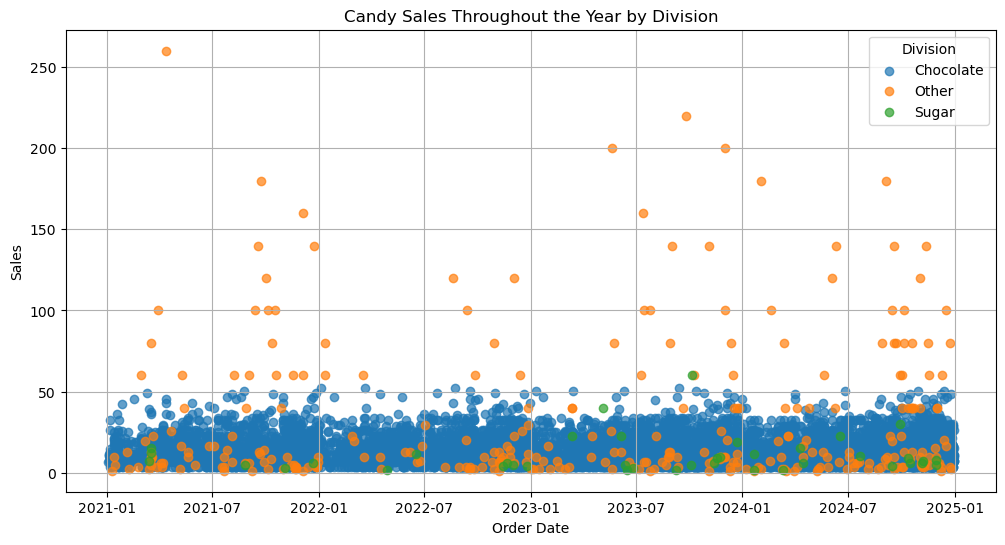

In [36]:
candy_sales_df['Year'] = candy_sales_df['Order Date'].dt.year
plt.figure(figsize=(12, 6))
for division in candy_sales_df['Division'].unique():
    division_data = candy_sales_df[candy_sales_df['Division'] == division]
    plt.scatter(division_data['Order Date'], division_data['Sales'], label=division, alpha=0.7)
    plt.title("Candy Sales Throughout the Year by Division")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend(title="Division")
plt.grid(True)
plt.show()


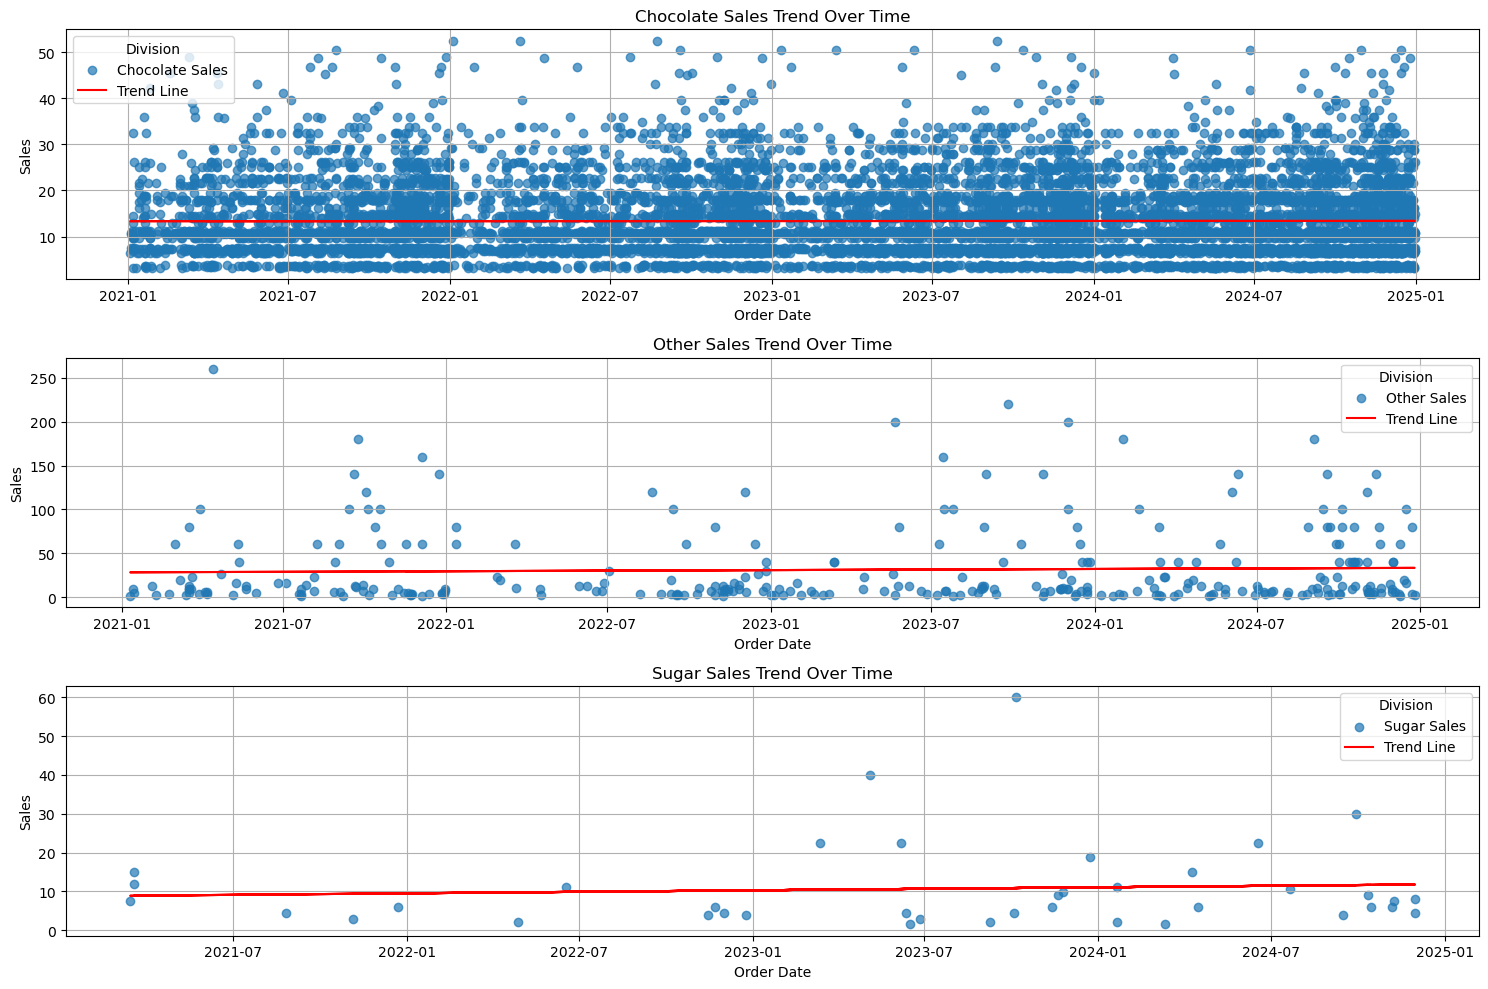

Chocolate - Slope of the trend line: 4.7186577681274715e-05, P-value: 0.8028964172121381
Other - Slope of the trend line: 0.0035155632331708517, P-value: 0.5272289135376194
Sugar - Slope of the trend line: 0.0021267653806000433, P-value: 0.6492179873298614


In [41]:
from scipy.stats import linregress
divisions = candy_sales_df['Division'].unique()

# Create a plot for each division
plt.figure(figsize=(15, 10))

for i, division in enumerate(divisions):
    # Filter data for the current division
    division_data = candy_sales_df[candy_sales_df['Division'] == division].copy()
    
    # Ensure 'Order Date' is in datetime format
    division_data['Order Date'] = pd.to_datetime(division_data['Order Date'], errors='coerce')

    # Check for NaN values and drop them
    division_data = division_data.dropna(subset=['Order Date', 'Sales'])

    # Create a new column for ordinal dates
    division_data['Date_ordinal'] = division_data['Order Date'].map(pd.Timestamp.toordinal)

    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(division_data['Date_ordinal'], division_data['Sales'])

    # Create a subplot for each division
    plt.subplot(len(divisions), 1, i + 1)  # Adjust for the number of divisions
    plt.scatter(division_data['Order Date'], division_data['Sales'], label=f"{division} Sales", alpha=0.7)
    plt.plot(division_data['Order Date'], intercept + slope * division_data['Date_ordinal'], color="red", label="Trend Line")
    plt.title(f"{division} Sales Trend Over Time")
    plt.xlabel("Order Date")
    plt.ylabel("Sales")
    plt.legend(title="Division")
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print slopes and p-values for each division
for division in divisions:
    division_data = candy_sales_df[candy_sales_df['Division'] == division].copy()
    division_data['Order Date'] = pd.to_datetime(division_data['Order Date'], errors='coerce')
    division_data = division_data.dropna(subset=['Order Date', 'Sales'])
    division_data['Date_ordinal'] = division_data['Order Date'].map(pd.Timestamp.toordinal)
    
    slope, intercept, r_value, p_value, std_err = linregress(division_data['Date_ordinal'], division_data['Sales'])
    print(f"{division} - Slope of the trend line: {slope}, P-value: {p_value}")

In [ ]:
# Which type of candy dominates (Eric)

In [ ]:
# Regional Findings (Bianca)


In [ ]:
# Volume Vs. Cost (Aidan)

In [ ]:
# Which Company is most successful (Yvette)